# Google Merchandise Store Sales Analysis: Insights into Customer Behavior and Revenue Trends

This project analyzes a curated subset of anonymized Google Analytics data from the Google Merchandise Store, focusing on item sales and user spending over three months. Using SQL and Python, I will clean and explore the data to uncover key insights into customer behavior and sales trends.

# Data Quality Check:

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Paths of the extracted CSV files
events_file = r'C:\Users\rabik\OneDrive\Desktop\google project\events1.csv'
items_file = r'C:\Users\rabik\OneDrive\Desktop\google project\items.csv'
users_file = r'C:\Users\rabik\OneDrive\Desktop\google project\users.csv'

# Load the CSV files into DataFrames
events_df = pd.read_csv(events_file)
items_df = pd.read_csv(items_file)
users_df = pd.read_csv(users_file)

# DATA CLEANING 

# 1. Clean the 'events' DataFrame
def clean_events_data(df):
    df['date'] = pd.to_datetime(df['date'])
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

# 2. Clean the 'items' DataFrame
def clean_items_data(df):
    df['price_in_usd'] = pd.to_numeric(df['price_in_usd'], errors='coerce')
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

# 3. Clean the 'users' DataFrame
def clean_users_data(df):
    df['date'] = pd.to_datetime(df['date'])
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

# Apply cleaning functions
cleaned_events_df = clean_events_data(events_df)
cleaned_items_df = clean_items_data(items_df)
cleaned_users_df = clean_users_data(users_df)

# Save cleaned DataFrames to CSV files
cleaned_events_file = r'C:\Users\rabik\OneDrive\Desktop\google project\cleaned_events.csv'
cleaned_items_file = r'C:\Users\rabik\OneDrive\Desktop\google project\cleaned_items.csv'
cleaned_users_file = r'C:\Users\rabik\OneDrive\Desktop\google project\cleaned_users.csv'

cleaned_events_df.to_csv(cleaned_events_file, index=False)
cleaned_items_df.to_csv(cleaned_items_file, index=False)
cleaned_users_df.to_csv(cleaned_users_file, index=False)



In [19]:
cleaned_events_df.head()

,user_id,ga_session_id,country,device,type,item_id,date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29


In [21]:
 cleaned_items_df.head()

,id,name,brand,variant,category,price_in_usd
0,0,Google Land & Sea Cotton Cap,Google,Single Option Only,Apparel,14
1,1,Google KeepCup,Google,Single Option Only,New,28
2,2,Google Land & Sea Nalgene Water Bottle,Google,Single Option Only,Drinkware,20
3,3,Google Unisex Eco Tee Black,Google,LG,Uncategorized Items,22
4,4,Google Chicago Campus Bottle,Google,Single Option Only,Campus Collection,11


In [25]:
cleaned_users_df.head()

,id,ltv,date
0,0,0,2020-10-13 05:08:47
1,1,0,2020-11-24 14:26:54
2,2,0,2020-11-24 06:19:54
3,3,231,2020-05-02 11:09:15
4,4,102,2020-11-18 15:54:38


# Analysis Phase:

With the data cleaning process complete, I will now proceed to analyze the dataset. This phase will focus on extracting meaningful insights into customer behavior, product performance, and sales trends to inform business decisions.



Eshtablishing connection with MYSQL database

In [7]:
pip install pymysql sqlalchemy pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
from sqlalchemy import create_engine

In [14]:
username = 'root'
password = 'mohit007'
host =  'localhost'
database = 'google_merch'

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}/{database}')

In [36]:
query ="SHOW TABLES;"
tables= pd.read_sql(query, con = engine)

print (tables)

  Tables_in_google_merch
0         cleaned_events
1          cleaned_items
2          cleaned_users


#  Analysis of Top 10 Revenue-Generating Products

In [62]:

query = """
SELECT i.name AS product_name, SUM(i.price_in_usd) AS total_revenue
FROM cleaned_events e
JOIN cleaned_items i ON e.item_id = i.id
WHERE e.type = 'purchase'
GROUP BY i.name
ORDER BY total_revenue DESC;

"""

# Execute the query and load the results into a DataFrame
result = pd.read_sql(query, con =engine)
result.head(10)





,product_name,total_revenue
0,Google Zip Hoodie F/C,6708.0
1,Google Men's Tech Fleece Grey,6131.0
2,Google Crewneck Sweatshirt Navy,5412.0
3,Google Badge Heavyweight Pullover Black,5290.0
4,Super G Unisex Joggers,4353.0
5,Google Women's Puff Jacket Black,3312.0
6,Google Crewneck Sweatshirt Green,3168.0
7,Google F/C Longsleeve Charcoal,2898.0
8,Google Navy Speckled Tee,2472.0
9,Google F/C Longsleeve Ash,2400.0


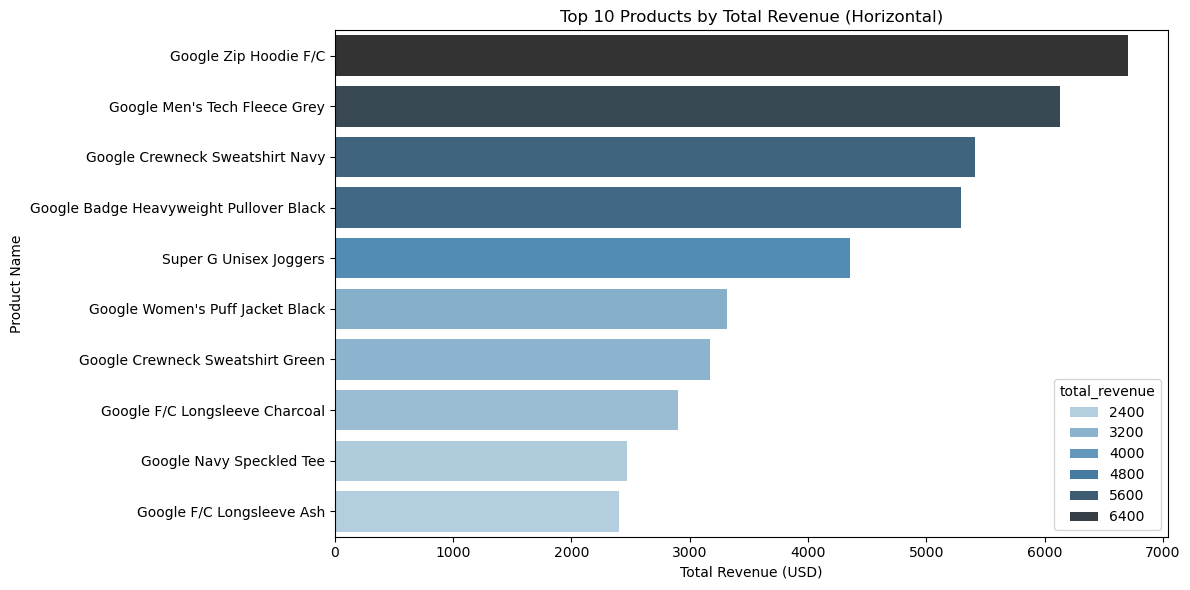

In [108]:
# Horizontal Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='product_name', hue='total_revenue', data=top_products, palette='Blues_d')
plt.title('Top 10 Products by Total Revenue (Horizontal)')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

# Trends in Purchase Behavior Over Time

In [130]:


query = """
SELECT DATE(e.date) AS event_date, COUNT(e.user_id) AS total_purchases
FROM cleaned_events e
WHERE e.type = 'purchase'
GROUP BY event_date
ORDER BY event_date;

"""

# Execute the query and load the results into a DataFrame
result2 = pd.read_sql(query2, con =engine)
result2.head(10)



,event_date,total_purchases
0,2020-11-01,33
1,2020-11-02,148
2,2020-11-03,141
3,2020-11-04,122
4,2020-11-05,97
5,2020-11-06,170
6,2020-11-07,91
7,2020-11-08,104
8,2020-11-09,114
9,2020-11-10,187


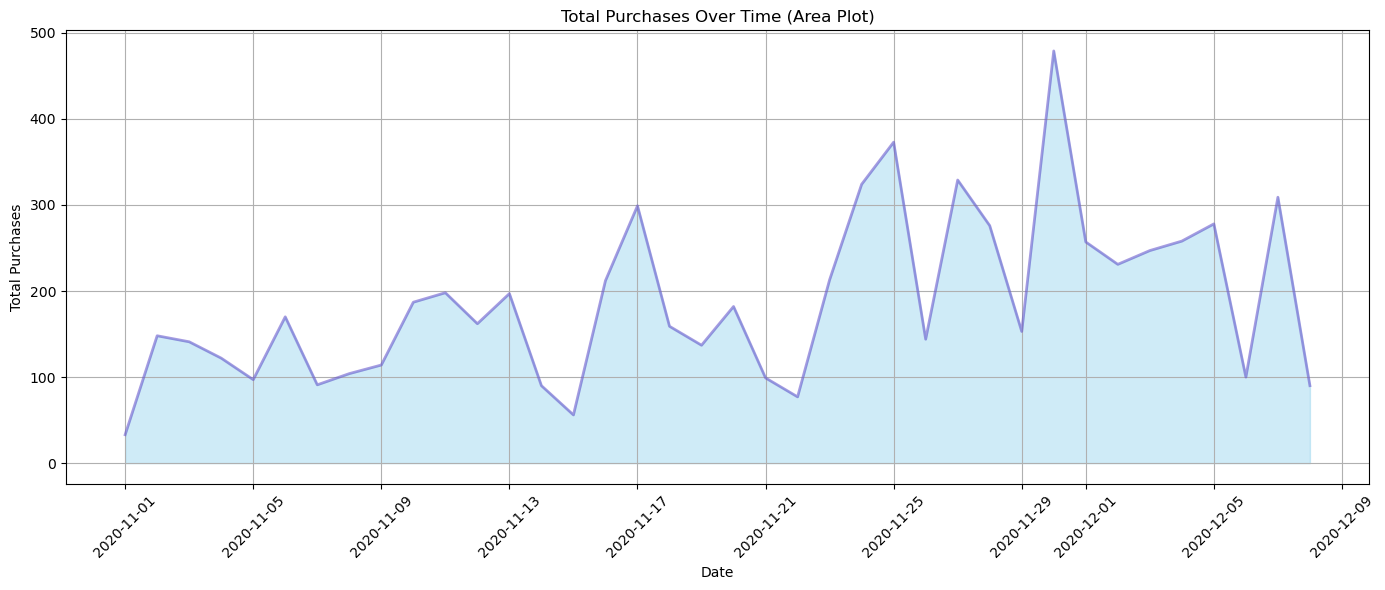

In [98]:


# Area Plot
plt.figure(figsize=(14, 6))
plt.fill_between(result2['event_date'], result2['total_purchases'], color='skyblue', alpha=0.4)
plt.plot(result2['event_date'], result2['total_purchases'], color='Slateblue', alpha=0.6, linewidth=2)
plt.title('Total Purchases Over Time (Area Plot)')
plt.xlabel('Date')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


# Item Categories with the Highest Average Revenue per Transaction

In [128]:
query3= """
SELECT i.category, AVG(i.price_in_usd) AS avg_revenue
FROM cleaned_events e
JOIN cleaned_items i ON e.item_id = i.id
WHERE e.type = 'purchase'
GROUP BY i.category
ORDER BY avg_revenue DESC;

"""


# Execute the query and load the results into a DataFrame
result3 = pd.read_sql(query3, con =engine)
result3.head(10)

,category,avg_revenue
0,Black Lives Matter,46.0000
1,Gift Cards,37.5000
2,Apparel,31.4589
3,Bags,26.9438
4,Uncategorized Items,19.7491
5,Shop by Brand,19.7233
6,Eco-Friendly,19.0000
7,Lifestyle,15.9143
8,Drinkware,15.4469
9,New,13.7290


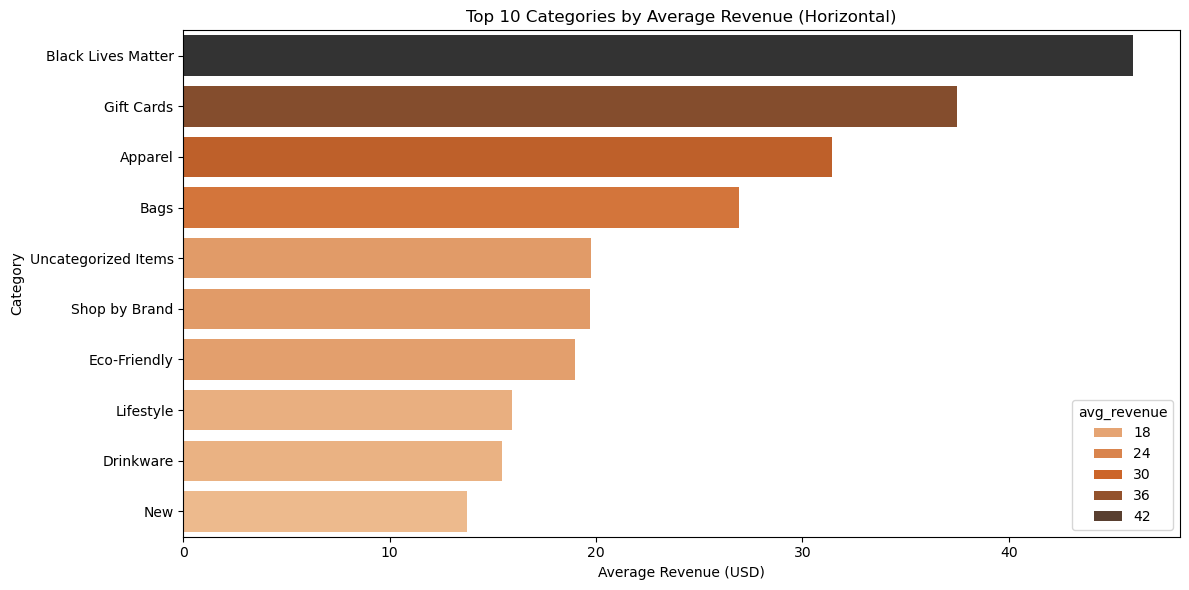

In [120]:
# Horizontal Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_revenue', y='category', hue='avg_revenue', data=top_categories, palette='Oranges_d')
plt.title('Top 10 Categories by Average Revenue (Horizontal)')
plt.xlabel('Average Revenue (USD)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Customer Actions Analysis: Most Frequent Behaviors (e.g., Add to Cart, Purchase)

In [132]:
query4 = """
SELECT e.type AS action_type, COUNT(e.user_id) AS total_actions
FROM cleaned_events e
GROUP BY e.type
ORDER BY total_actions DESC;"""

# Execute the query and load the results into a DataFrame
result4 = pd.read_sql(query4, con =engine)
result4.head(10)

,action_type,total_actions
0,add_to_cart,194113
1,begin_checkout,12819
2,purchase,7136


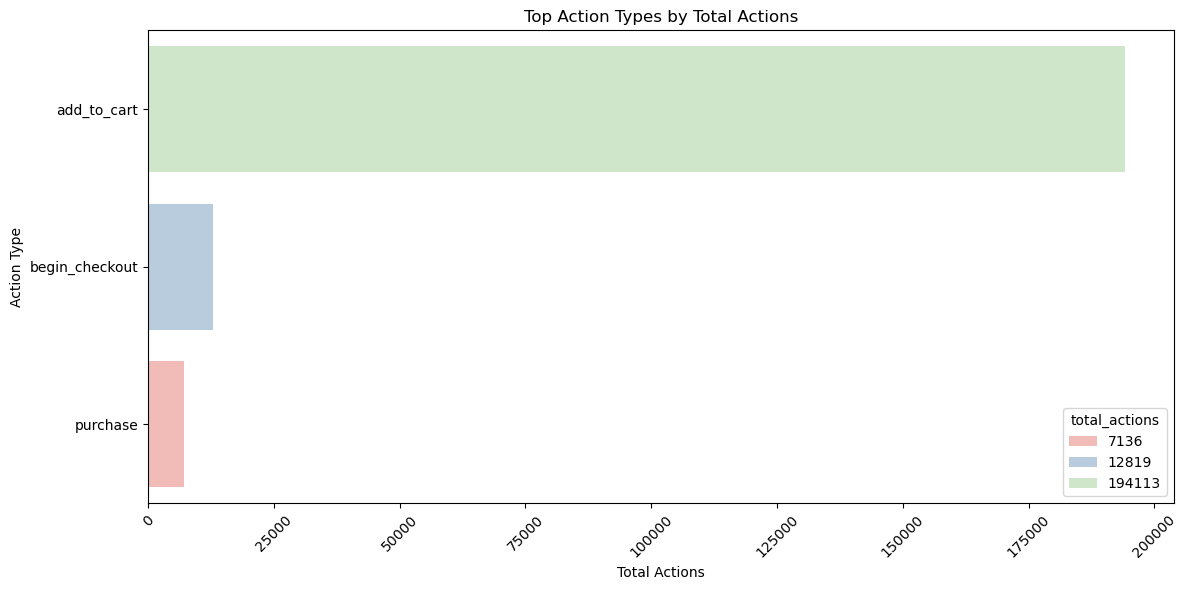

In [140]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='total_actions', y='action_type', hue ='total_actions',  data=top_actions, palette='Pastel1')
plt.title('Top Action Types by Total Actions')
plt.xlabel('Total Actions')
plt.ylabel('Action Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identifying High-Value Customers Based on Total Spending

In [142]:
query5= """
SELECT e.user_id, SUM(i.price_in_usd) AS total_spent
FROM cleaned_events e
JOIN cleaned_items i ON e.item_id = i.id
WHERE e.type = 'purchase'
GROUP BY e.user_id
ORDER BY total_spent DESC
LIMIT 10;
"""

# Execute the query and load the results into a DataFrame
result5 = pd.read_sql(query5, con =engine)
result5.head(10)

,user_id,total_spent
0,11073,878.0
1,20451,857.0
2,28943,781.0
3,12103,568.0
4,31119,564.0
5,15696,504.0
6,29818,488.0
7,29975,488.0
8,17570,450.0
9,24063,429.0


# Top-Selling Categories by Purchase Volume

In [150]:
query6= """ SELECT i.category, SUM(e.item_id) AS total_quantity_sold
FROM cleaned_events e
JOIN cleaned_items i ON e.item_id = i.id
WHERE e.type = 'purchase'
GROUP BY i.category
ORDER BY total_quantity_sold DESC;"""

# Execute the query and load the results into a DataFrame
result6 = pd.read_sql(query6, con =engine)
result6.head(10)

,category,total_quantity_sold
0,Apparel,740194.0
1,Campus Collection,164874.0
2,New,127753.0
3,Accessories,116621.0
4,Clearance,97069.0
5,Uncategorized Items,78577.0
6,Bags,71238.0
7,Office,66064.0
8,Lifestyle,55462.0
9,Shop by Brand,46254.0


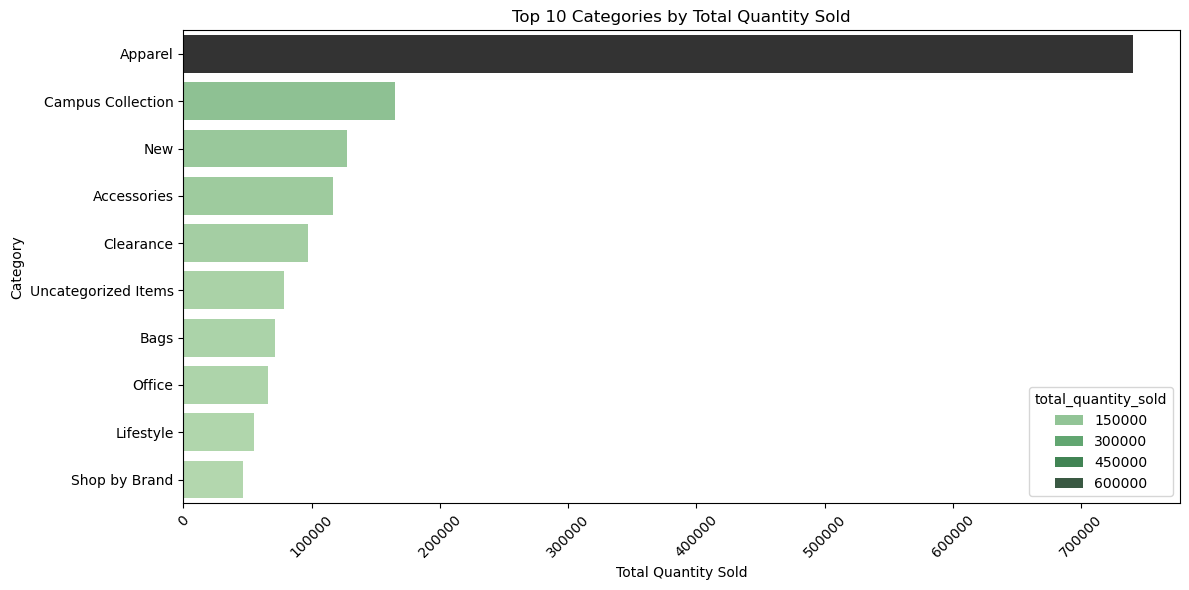

In [154]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='total_quantity_sold', y='category', hue ='total_quantity_sold', data=top_categories, palette='Greens_d')
plt.title('Top 10 Categories by Total Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis of Peak Purchase Activity by Hour of the Day

In [217]:
query7= """
SELECT HOUR(e.date) AS hour, COUNT(e.user_id) AS total_purchases
FROM cleaned_events e
WHERE e.type = 'purchase'
GROUP BY hour
ORDER BY total_purchases DESC
limit 10;

"""

# Execute the query and load the results into a DataFrame
result7 = pd.read_sql(query7, con =engine)
result7.head(10)

,hour,total_purchases
0,5,360
1,8,354
2,21,338
3,2,337
4,12,334
5,4,328
6,23,328
7,20,319
8,16,313
9,6,308


# Products Frequently Added to Cart but Not Purchased

In [184]:
query8 = """
SELECT i.name, COUNT(e.user_id) AS add_to_cart_count
FROM cleaned_events e
JOIN cleaned_items i ON e.item_id = i.id
WHERE e.type = 'add_to_cart'
AND i.id NOT IN (SELECT item_id FROM cleaned_events WHERE type = 'purchase')
GROUP BY i.name
ORDER BY add_to_cart_count DESC
LIMIT 10;"""

# Execute the query and load the results into a DataFrame
result8 = pd.read_sql(query8, con =engine)
result8.head(10)

,name,add_to_cart_count
0,Google Eco Tee Black,489
1,Super G Unisex Joggers,356
2,Google Zip Hoodie F/C,261
3,Google Navy Speckled Tee,218
4,Google Campus Bike Eco Tee Navy,204
5,Google Infant Charcoal Onesie,177
6,Google F/C Long Sleeve Tee Charcoal,163
7,Google Badge Heavyweight Pullover Black,136
8,Google Land & Sea French Terry Sweatshirt,135
9,Google Crewneck Sweatshirt Navy,122


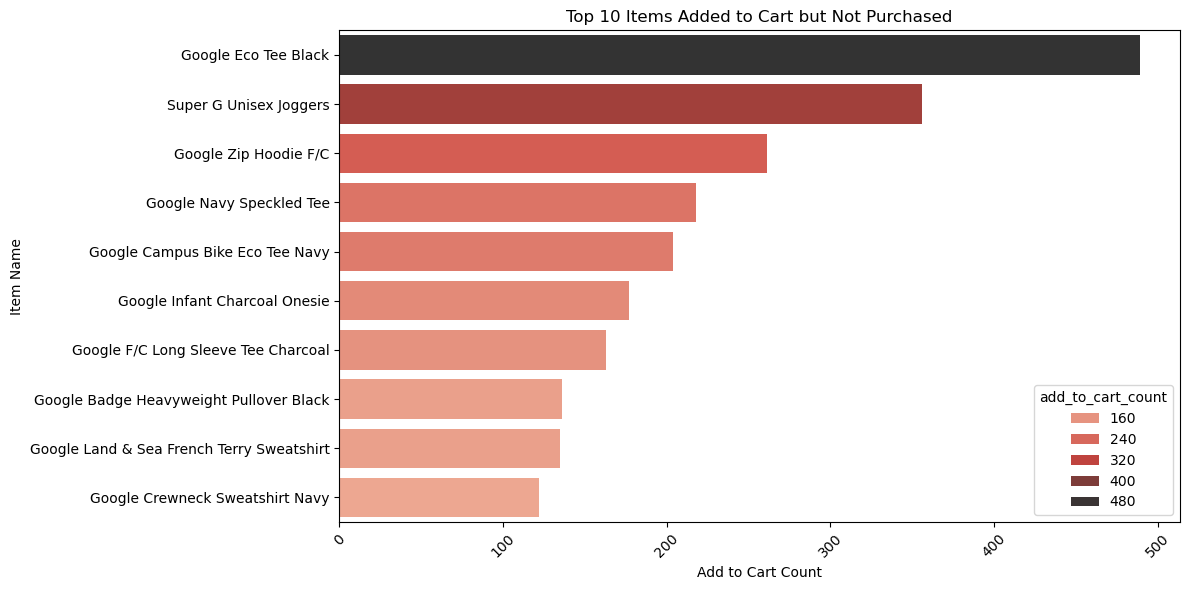

In [188]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='add_to_cart_count', y='name', hue ='add_to_cart_count', data=top_items, palette='Reds_d')
plt.title('Top 10 Items Added to Cart but Not Purchased')
plt.xlabel('Add to Cart Count')
plt.ylabel('Item Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Impact of Device Type on Purchasing Behavior

In [190]:
query9= """
SELECT e.device, COUNT(e.user_id) AS total_purchases
FROM cleaned_events e
WHERE e.type = 'purchase'
GROUP BY e.device
ORDER BY total_purchases DESC;
"""

# Execute the query and load the results into a DataFrame
result9 = pd.read_sql(query9, con =engine)
result9.head(10)

,device,total_purchases
0,desktop,4062
1,mobile,2947
2,tablet,127


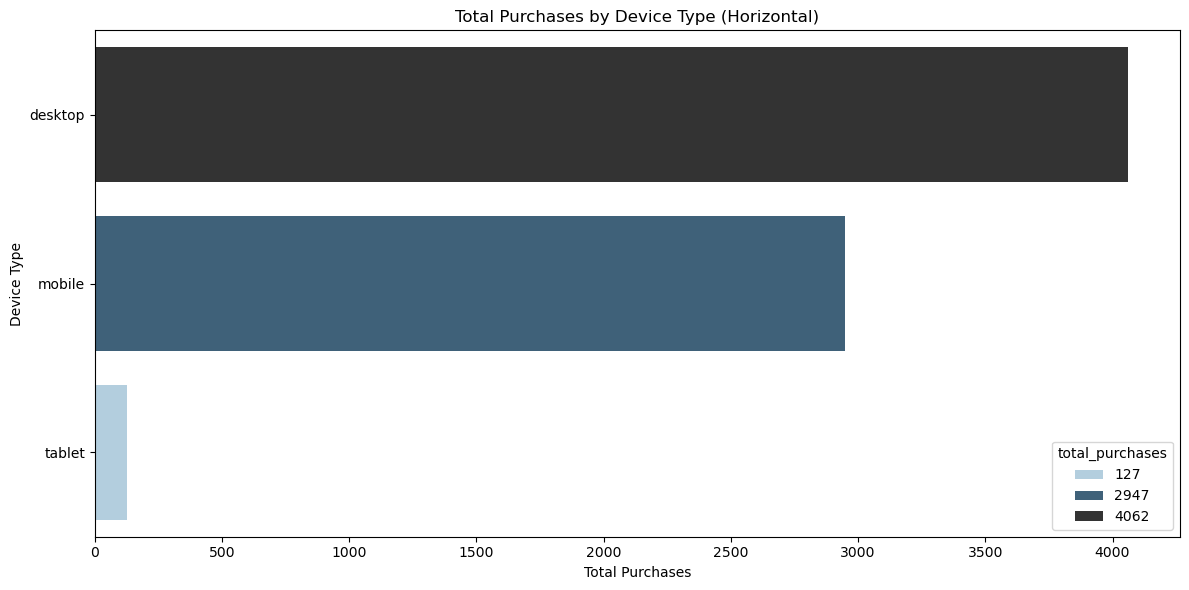

In [196]:
# Horizontal Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='total_purchases', y='device', hue = 'total_purchases', data=top_devices, palette='Blues_d')
plt.title('Total Purchases by Device Type (Horizontal)')
plt.xlabel('Total Purchases')
plt.ylabel('Device Type')
plt.tight_layout()
plt.show()

# Correlation Between Items Added to Cart and Purchase Conversion Rate

In [206]:
query10= """
SELECT e.user_id, COUNT(CASE WHEN e.type = 'add_to_cart' THEN 1 END) AS total_add_to_cart,
       COUNT(CASE WHEN e.type = 'purchase' THEN 1 END) AS total_purchases
FROM cleaned_events e
GROUP BY e.user_id
order by total_purchases desc
;
"""
# Execute the query and load the results into a DataFrame
result10 = pd.read_sql(query10, con =engine)
result10.head(10)


,user_id,total_add_to_cart,total_purchases
0,17570,0,36
1,15696,0,35
2,20451,0,34
3,29975,0,28
4,30312,300,28
5,11073,179,26
6,18602,0,24
7,28943,315,24
8,29110,326,23
9,754,456,22


# Total Revenue by Country and Device

In [66]:
query11= """
with country_revenue as (SELECT i.id,e.country, e.device, i.price_in_usd from cleaned_events e
join cleaned_items i on e.item_id = i.id)
select device, country, sum(price_in_usd) as total_revenue from country_revenue
group by country, device
order by total_revenue desc
limit 10;

"""

# Execute the query and load the results into a DataFrame
result11 = pd.read_sql(query11, con =engine)
result11.head(10)

,device,country,total_revenue
0,desktop,US,171893.0
1,mobile,US,108350.0
2,desktop,IN,34935.0
3,desktop,CA,27264.0
4,mobile,IN,22984.0
5,mobile,CA,21622.0
6,desktop,GB,9261.0
7,desktop,FR,6585.0
8,desktop,ES,6416.0
9,mobile,ES,6369.0


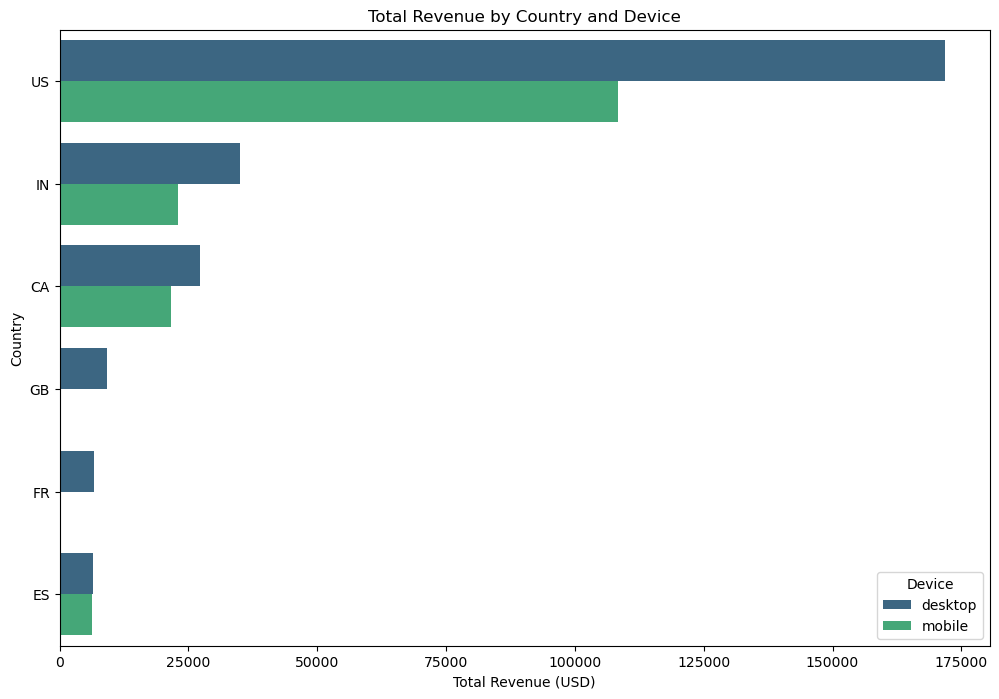

In [68]:
# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='total_revenue', y='country', hue='device', data=result11, palette='viridis')
plt.title('Total Revenue by Country and Device')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Country')
plt.legend(title='Device')
plt.show()

# Key Recommendations for Google Merchandise Store:

Targeted Marketing:
Use customer behavior data to create personalized ads focused on high-engagement regions and devices (like mobile users in the U.S.). This will boost conversions and improve ad effectiveness.

Product and Inventory Optimization:
Adjust product recommendations, pricing, and inventory based on top-selling items and those frequently left in carts. Offering discounts or bundles on abandoned items can turn potential losses into sales.

Better Desktop Experience:
Improve the desktop shopping experience with a faster, more intuitive interface. Since desktop users represent a large share of buyers, this will drive more purchases.

Accurate Sales Forecasting:
Use sales data to predict demand and manage inventory better, preventing stock shortages or excess stock, especially during peak periods.

Personalized Shopping:
Offer personalized product recommendations and targeted promotions based on each customer’s shopping behaviour to increase engagement and boost sales.

